## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

master_dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

master_dataset.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. # the return should be 2142

mice_count = master_dataset["Mouse ID"]
mice_count.count()

# # Identify incomplete rows
# master_dataset.count()


1893

In [3]:
master_dataset.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Verifying the columns within the dataset
master_dataset.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Select all duplicate rows based on multiple column names in list
dupe_check = master_dataset[master_dataset.duplicated(["Mouse ID","Timepoint"])]
dupe_check = dupe_check.set_index("Mouse ID")
print("Duplicate Rows based on 2 columns are:", dupe_check, sep='\n')


Duplicate Rows based on 2 columns are:
         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               47.570392                 0  
g989               49.880528                 0  
g989               53.442020                 0  
g989               54.657650                 1  


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 

# Completed in my output above


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = master_dataset.set_index('Mouse ID')
clean_data = clean_data.drop(dupe_check.index)
clean_data.reset_index(inplace=True)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


clean_data_df = clean_data.groupby('Drug Regimen')
clean_data_df = clean_data_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]



# Renaming column names
clean_data_df = clean_data_df.rename(columns= {"mean": "Mean",
                                               "median": "Median",
                                               "var": "Variance",
                                               "std": "Standard Deviation",
                                               "sem": "SEM"
                                               })


# Use Map to format all the columns
clean_data_df["Mean"] = clean_data_df["Mean"].map("{:,.2f}".format)
clean_data_df["Median"] = clean_data_df["Median"].map("{:,.2f}".format)
clean_data_df["Variance"] = clean_data_df["Variance"].map("{:,.2f}".format)
clean_data_df["Standard Deviation"] = clean_data_df["Standard Deviation"].map("{:,.2f}".format)
clean_data_df["SEM"] = clean_data_df["SEM"].map("{:,.2f}".format)


clean_data_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


clean_data_df = clean_data.groupby(["Mouse ID","Drug Regimen"]).count()

tumor_mean = clean_data_df ["Tumor Volume (mm3)"].mean()
tumor_median = clean_data_df ["Tumor Volume (mm3)"].median()
tumor_var = clean_data_df ["Tumor Volume (mm3)"].var()
tumor_std = clean_data_df ["Tumor Volume (mm3)"].std()
tumor_sem = clean_data_df ["Tumor Volume (mm3)"].sem()

# Creating DataFrame to hold the above results
summary_stat = pd.DataFrame({"Mean": [tumor_mean],
                            "Median": [tumor_median],
                            "Variance": [tumor_var],
                            "Standard Deviation": [tumor_std],
                             "SEM": [tumor_sem]
                            })

# Use Map to format all the columns
summary_stat["Mean"] = summary_stat["Mean"].map("{:,.2f}".format)
summary_stat["Median"] = summary_stat["Median"].map("{:,.2f}".format)
summary_stat["Variance"] = summary_stat["Variance"].map("{:,.2f}".format)
summary_stat["Standard Deviation"] = summary_stat["Standard Deviation"].map("{:,.2f}".format)
summary_stat["SEM"] = summary_stat["SEM"].map("{:,.2f}".format)

summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
0,7.58,10.00,9.60,3.10,0.20


## Bar and Pie Charts

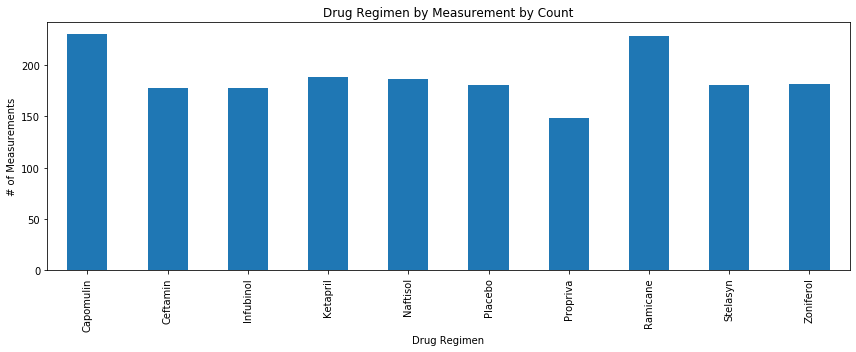

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create grouping
regimen_grouping = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

regimen_grouping.plot(kind="bar",figsize=(12,5))


# Display chart
plt.title("Drug Regimen by Measurement by Count")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

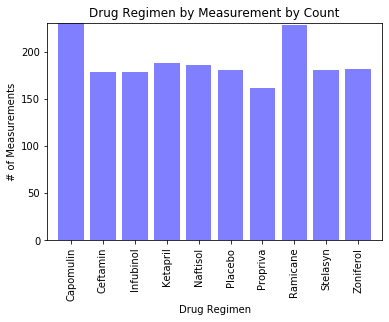

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis = [230,178,178,188,186,181,161,228,181,182]

# Count the amount of Drug Regimen for x-axis
x_axis = np.arange(len(regimen_grouping))

# Create a bar chart based upon the avove data
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

# Create the ticks for our bar chart's x ais
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (drug_regimen), rotation='vertical')

#Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(y_axis)+0.4)


# Give the chart a title, x label, and y label
plt.title("Drug Regimen by Measurement by Count")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")

# Save an image of the chart and print it to the screen
plt.savefig("../Images/Drug_Regimen_Measurement.png")
plt.show()


(-0.75, 9.75)

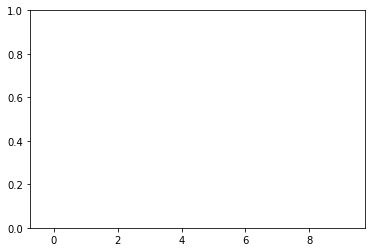

In [15]:
#Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)


(0, 230.4)

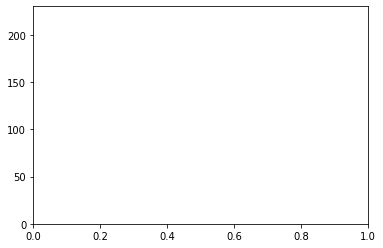

In [16]:
# Set the limits of the y axis
plt.ylim(0, max(y_axis)+0.4)

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create grouping of Mouse Id and sex
gender_grouping = clean_data.groupby(["Mouse ID","Sex"])

# Return the size
gender_grouping_df = pd.DataFrame(gender_grouping.size())

# Create a column for total count
mouse_gender = pd.DataFrame(gender_grouping_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Apply formula to capture the percentage of sex
mouse_gender["% of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum())*100)

mouse_gender


,Total Count,% of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


([<matplotlib.patches.Wedge at 0x7fecd5d0a4a8>,
 [Text(-0.7771287477781478, -0.9143691319028482, 'Female'),
  Text(0.7123680187966356, 0.8381717042442774, 'Male')],
 [Text(-0.45332510287058614, -0.5333819936099948, '49.8%'),
  Text(0.3885643738890739, 0.457184565951424, '50.2%')])

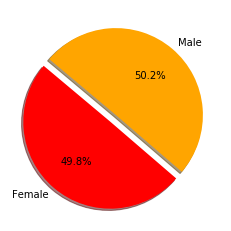

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
gender_type = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.799197, 50.200803]

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to seperate the "gender" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=gender_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [41]:
clean_data_new = clean_data.groupby('Mouse ID')[["Timepoint"]].max()
clean_data_new.reset_index(inplace=True)

# Completing my merge of the overall school percentages with summary

clean_data_summary = pd.merge(clean_data, clean_data_new, on=["Mouse ID", "Timepoint"], how='right')
clean_data_summary

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list to store the regimens
treatment_types = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume = []
                   
                   
for drug in treatment_types:
                   
    tumor_vol = clean_data_summary.loc[clean_data_summary['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    volume.append(tumor_vol)
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    
    outlier_tumor_vol = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(drug,outlier_tumor_vol )
    
#     print(f" The drug {drug} and the outlier for volume is {outlier_tumor_vol}")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be out

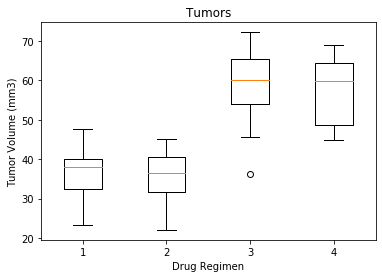

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, x_axis = plt.subplots()
x_axis.set_title('Tumors')
x_axis.set_ylabel('Tumor Volume (mm3)')
x_axis.set_xlabel('Drug Regimen')

x_axis.boxplot(volume)

# plt.savefig(volume)
plt.show()

## Line and Scatter Plots

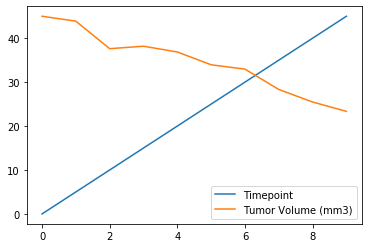

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_drilldown = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin']

capomulin_drilldown.reset_index(drop=True, inplace=True)

mouse_id = capomulin_drilldown.iloc[0,0]

filtered_mouse = capomulin_drilldown[capomulin_drilldown['Mouse ID'] == mouse_id]

filtered_mouse = filtered_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

Capomulin_line = filtered_mouse.plot.line()

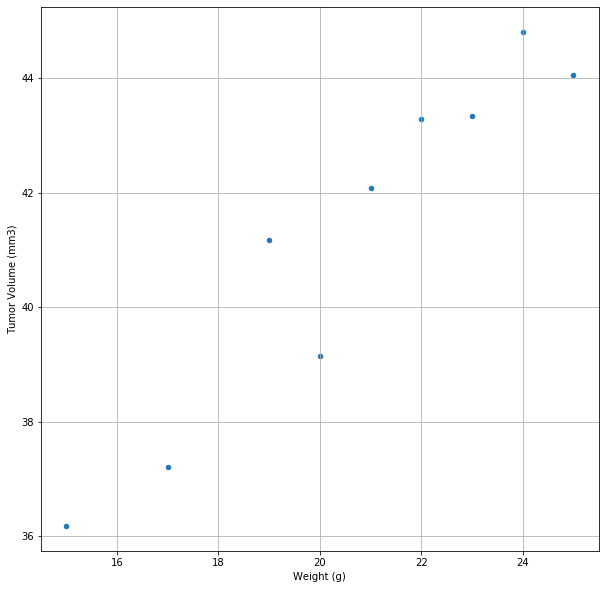

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_drilldown_scat = capomulin_drilldown[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

# Apply groupby function for Capomulin
groupby_capomulin = capomulin_drilldown_scat.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

scat_capomulin_df = pd.DataFrame(groupby_capomulin).reset_index()

scat_capomulin_df = scat_capomulin_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (10,10))
scat_capomulin_df


## Correlation and Regression

In [58]:
# Creating DataFrame to capture the mean of the Weight and Tumor Vol

capolumlin_corr = pd.DataFrame(groupby_capomulin).reset_index()
capolumlin_corr


,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


The correlation between Weight and the Average Tumor Volume for the Capomulin regimen is: 0.95
The r-squared is: 0.9034966277438606


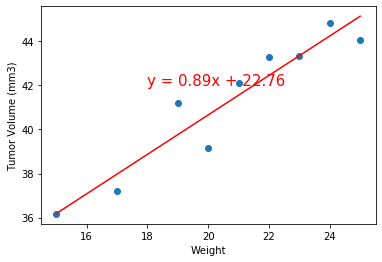

In [59]:
# Calculate the correlation coefficient and linear regression model 
mouse_weight = capolumlin_corr.iloc[:,0]
avg_tumor_vol = capolumlin_corr.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)

print(f'The correlation between Weight and the Average Tumor Volume for the Capomulin regimen is: {round(correlation[0],2)}')

# Add the linear regression equation and line to plot
x_values = capolumlin_corr["Weight (g)"]
y_values = capolumlin_corr["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,42),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")


plt.show()


# for mouse weight and average tumor volume for the Capomulin regimen
